##Classification de chiffres manuscrits (MNIST)

Dans ce projet, nous utilisons le dataset **MNIST**, qui contient des images de chiffres manuscrits de 0 à 9, pour entraîner un modèle capable de les reconnaître automatiquement.

Nous allons construire et comparer les performances d’un **réseau de neurones convolutifs (CNN)**, et créer une interface interactive pour tester le modèle sur des images dessinées ou téléchargées.

L’objectif est de voir :  
- Comment un CNN peut apprendre à reconnaître des chiffres manuscrits  
- Quelle est la précision du modèle sur un jeu de test  
- Comment créer une interface interactive avec **Gradio**


In [ ]:
# Import des librairies nécessaires
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt


# Étape 1 : Chargement et préparation du dataset MNIST

Nous commençons par charger le **dataset MNIST** intégré à Keras, qui contient des images de chiffres manuscrits (0 à 9).  

Ensuite, nous effectuons les étapes de prétraitement nécessaires pour le CNN :  
- **Normalisation** : les valeurs des pixels sont mises entre 0 et 1  
- **Reshape** : adaptation de la forme des images pour le CNN `(28, 28, 1)`  

Enfin, nous affichons la taille du jeu d'entraînement et du jeu de test pour vérifier que tout est correct.


In [ ]:
# Chargement du dataset MNIST intégré à Keras
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

# Normalisation (mettre les valeurs entre 0 et 1)
X_train = X_train / 255.0
X_test = X_test / 255.0

# Adapter la forme des images pour le CNN : (28, 28, 1)
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

print("Taille du jeu d'entraînement :", X_train.shape)
print("Taille du jeu de test :", X_test.shape)


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Taille du jeu d'entraînement : (60000, 28, 28, 1)
Taille du jeu de test : (10000, 28, 28, 1)


# Étape 2 : Création du modèle CNN

Dans cette étape, nous construisons notre **réseau de neurones convolutifs (CNN)** pour reconnaître les chiffres manuscrits.

### Étapes :

1. **Couches convolutives** :  
   - `Conv2D(32, (3,3))` avec activation ReLU  
   - `Conv2D(64, (3,3))` avec activation ReLU  
   Ces couches permettent d’extraire les caractéristiques des images.  

2. **Couches de pooling** : `MaxPooling2D((2,2))` pour réduire la taille des cartes de caractéristiques et limiter l’overfitting.  

3. **Flatten** : transformation des matrices 2D en vecteur pour les couches denses.  

4. **Couches denses** :  
   - `Dense(64, activation='relu')` pour apprendre des combinaisons de caractéristiques complexes  
   - `Dense(10, activation='softmax')` pour produire la probabilité de chaque chiffre (0–9).  

5. **Compilation du modèle** : utilisation de l’optimiseur Adam et de la fonction de perte `sparse_categorical_crossentropy`.  

Enfin, nous affichons le **résumé du modèle** pour vérifier sa structure.


In [ ]:
# Création du modèle CNN
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compilation du modèle
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Affichage du résumé
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │       102,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 121,930 (476.29 KB)

 Trainable params: 121,930 (476.29 KB)

 Non-trainable params: 0 (0.00 B)

# Étape 3 : Entraînement du modèle CNN

Nous allons maintenant **entraîner notre modèle** sur le jeu de données MNIST.

### Détails de l’entraînement :

1. **Données d’entraînement** : `X_train` et `y_train`  
2. **Nombre d’époques** : 5 (le modèle passera 5 fois sur l’ensemble du jeu d’entraînement)  
3. **Validation** : utilisation de `X_test` et `y_test` pour suivre la performance du modèle sur des données non vues pendant l’entraînement  

Le résultat de l’entraînement est stocké dans `history`, qui contient les **valeurs de précision et de perte** pour chaque époque.


In [ ]:
# Entraînement du modèle
history = model.fit(X_train, y_train, epochs=5, validation_data=(X_test, y_test))

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 62s 32ms/step - accuracy: 0.9067 - loss: 0.3125 - val_accuracy: 0.9833 - val_loss: 0.0542
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 83s 33ms/step - accuracy: 0.9840 - loss: 0.0505 - val_accuracy: 0.9874 - val_loss: 0.0415
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 57s 30ms/step - accuracy: 0.9894 - loss: 0.0336 - val_accuracy: 0.9892 - val_loss: 0.0352
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 61s 33ms/step - accuracy: 0.9934 - loss: 0.0230 - val_accuracy: 0.9897 - val_loss: 0.0332
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 32ms/step - accuracy: 0.9938 - loss: 0.0191 - val_accuracy: 0.9877 - val_loss: 0.0388


# Étape 4 : Évaluation du modèle

Après l’entraînement, nous évaluons notre modèle sur le **jeu de test** pour mesurer sa capacité à généraliser à de nouvelles données.

### Étapes :

1. **Évaluation** : calcul de la perte (`loss`) et de la précision (`accuracy`) sur `X_test` et `y_test`.  
2. **Affichage de l’accuracy** : affichage de la précision finale sur le jeu de test.  
3. **Visualisation de l’entraînement** : tracé de la progression de la précision (`accuracy`) et de la précision de validation (`val_accuracy`) au fil des époques pour suivre l’apprentissage du modèle.


313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.9842 - loss: 0.0533

✅ Accuracy sur les données de test : 0.9876999855041504


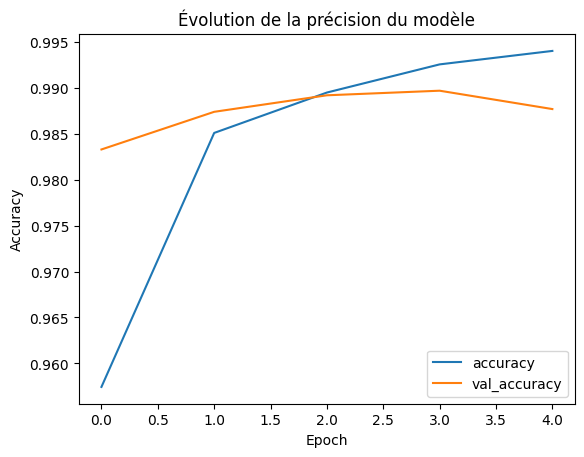

In [ ]:
# Évaluer le modèle
test_loss, test_acc = model.evaluate(X_test, y_test)
print("\n✅ Accuracy sur les données de test :", test_acc)

# Visualisation de la progression de l'entraînement
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title("Évolution de la précision du modèle")
plt.show()

# Étape 5 : Sauvegarde du modèle

Une fois le modèle entraîné, nous le **sauvegardons** pour pouvoir le réutiliser sans avoir à le réentraîner.

- Le modèle est enregistré au format **HDF5** (`.h5`) sous le nom `mnist_cnn_model.h5`.  
- Cela permet de **charger le modèle plus tard** pour faire des prédictions ou créer une interface interactive.


In [ ]:
# Sauvegarde du modèle entraîné
model.save("mnist_cnn_model.h5")
print("Modèle enregistré sous 'mnist_cnn_model.h5'")

Modèle enregistré sous 'mnist_cnn_model.h5'


# Étape 6 : Prédiction sur une image individuelle

Pour tester notre modèle, nous allons **sélectionner une image au hasard** dans le jeu de test et observer sa prédiction.

### Étapes :

1. **Choix de l’image** : sélection d’une image de `X_test` via son index.  
2. **Affichage** : visualisation de l’image pour vérifier ce que le modèle doit prédire.  
3. **Prédiction** : passage de l’image au modèle et obtention du chiffre prédit (`np.argmax`)  
4. **Comparaison** : affichage du chiffre prédit et du chiffre réel (`y_test`) pour vérifier la précision du modèle sur un exemple concret.


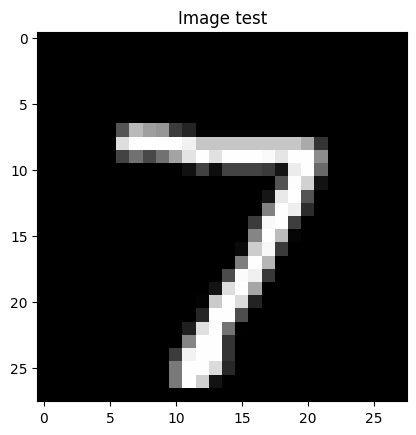

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step
Chiffre prédit : 7
Chiffre réel : 7


In [ ]:
import numpy as np

# Choisir une image au hasard
index = 0
image = X_test[index]

# Afficher l'image
plt.imshow(image.squeeze(), cmap='gray')
plt.title("Image test")
plt.show()

# Prédiction
prediction = model.predict(np.expand_dims(image, axis=0))
print("Chiffre prédit :", np.argmax(prediction))
print("Chiffre réel :", y_test[index])

# Étape 7 : Installation de Gradio

Pour créer une **interface interactive** permettant de tester notre modèle sur des images dessinées ou téléchargées, nous devons installer la bibliothèque **Gradio**.

- La commande `!pip install gradio -q` installe Gradio dans l’environnement Colab.  
- L’option `-q` permet d’effectuer l’installation **en mode silencieux**, sans afficher tous les messages de progression.


In [ ]:
!pip install gradio -q


# Étape 8 : Chargement du modèle sauvegardé

Après avoir entraîné et sauvegardé le modèle, nous pouvons le **recharger** pour l’utiliser directement sans réentraînement.

- La fonction `load_model("mnist_cnn_model.h5")` permet de **restaurer le modèle complet** (architecture + poids + compilation).  
- Cela facilite les prédictions ultérieures et la création d’une interface interactive.


In [ ]:
from tensorflow.keras.models import load_model

model = load_model("mnist_cnn_model.h5")

# Étape 9 : Création de la fonction de prédiction pour Gradio

Nous définissons une **fonction `predict_digit`** qui prend en entrée une image et renvoie les probabilités pour chaque chiffre (0–9).

### Étapes de la fonction :

1. **Vérification** : si aucune image n’est fournie, on renvoie un dictionnaire avec toutes les probabilités à 0.  
2. **Prétraitement** :  
   - Redimensionnement à `28x28`  
   - Conversion en niveaux de gris  
   - Inversion des couleurs (fond blanc, chiffre noir)  
   - Normalisation des valeurs des pixels entre 0 et 1  
   - Reshape pour correspondre à l’entrée du CNN `(1, 28, 28, 1)`  
3. **Prédiction** : passage de l’image prétraitée au modèle pour obtenir les probabilités de chaque chiffre.  
4. **Sortie** : dictionnaire `{chiffre: probabilité}` utilisé par Gradio pour l’affichage.


In [ ]:
import gradio as gr
import numpy as np
import cv2
from tensorflow.keras.models import load_model

# Charger ton modèle sauvegardé
model = load_model("mnist_cnn_model.h5")

# Fonction de prédiction
def predict_digit(image):
    if image is None:
        return {str(i): 0.0 for i in range(10)}

    # Redimensionner et convertir en niveaux de gris
    image = cv2.resize(image, (28, 28))
    image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

    # Inverser les couleurs manuellement (fond blanc, trait noir)
    image = 255 - image

    # Normaliser et reformater
    image = image / 255.0
    image = image.reshape(1, 28, 28, 1)

    # Prédire
    prediction = model.predict(image)
    return {str(i): float(prediction[0][i]) for i in range(10)}

# Interface Gradio simp


# Étape 10 : Compilation du modèle chargé

Même après avoir rechargé le modèle depuis le fichier `.h5`, il est recommandé de **recompiler le modèle** avant de l’utiliser pour des prédictions ou pour l’entraînement supplémentaire.

- **Optimiseur** : `adam` pour mettre à jour les poids du modèle  
- **Fonction de perte** : `sparse_categorical_crossentropy`, adaptée à une classification multi-classe avec des labels entiers  
- **Métrique** : `accuracy` pour suivre la précision des prédictions


In [ ]:
# Après avoir chargé ton modèle :
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


# Étape 11 : Création de l'interface interactive avec Gradio

Nous créons une **interface utilisateur interactive** pour tester le modèle sur des images de chiffres manuscrits.

### Fonctionnalités de l'interface :

1. **Téléchargement d'image** : l'utilisateur peut uploader une image d'un chiffre.  
2. **Prédiction** : la fonction `predict_digit` traite l'image et renvoie :  
   - Les probabilités pour chaque chiffre (0–9)  
   - Le chiffre prédit avec le niveau de confiance  
   - Le nombre total de prédictions effectuées (`prediction_counter`)  
3. **Affichage des résultats** :  
   - `gr.Label` pour visualiser les probabilités  
   - `gr.Textbox` pour afficher le chiffre prédit et le compteur  
4. **Personnalisation** : titre, description et thème de l’interface (`gradio/soft`)  
5. **Mode live** : les prédictions se mettent à jour immédiatement après le téléchargement de l'image  

Enfin, `interface.launch(debug=True)` **démarre l'interface** et affiche un lien pour tester le modèle dans le navigateur.


In [ ]:
import gradio as gr
import numpy as np
import cv2
from tensorflow.keras.models import load_model

# Charger ton modèle
model = load_model("mnist_cnn_model.h5")
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Compteur global de prédictions
prediction_counter = 0

# Fonction de prédiction
def predict_digit(image):
    global prediction_counter
    if image is None:
        return (
            {str(i): 0.0 for i in range(10)},
            "Dessine un chiffre pour commencer !",
            f"Total des prédictions : {prediction_counter}"
        )

    # Prétraitement de l'image
    image = cv2.resize(image, (28, 28))
    image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    image = 255 - image  # inversion pour fond blanc / trait noir
    image = image / 255.0
    image = image.reshape(1, 28, 28, 1)

    # Prédiction
    prediction = model.predict(image)
    pred_class = np.argmax(prediction)
    confidence = np.max(prediction)

    prediction_counter += 1

    return (
        {str(i): float(prediction[0][i]) for i in range(10)},
        f"🧠 Chiffre prédit : {pred_class} (Confiance : {confidence:.2%})",
        f"Total des prédictions : {prediction_counter}"
    )

# Interface Gradio “Pro”
interface = gr.Interface(
    fn=predict_digit,
    inputs=gr.Image(
        image_mode="RGB",
        sources=["upload"],  # Permet à l'utilisateur de télécharger une image
        height=250,
        width=250
    ),
    outputs=[
        gr.Label(num_top_classes=3, label="Probabilités des chiffres"),
        gr.Textbox(label="Résultat"),
        gr.Textbox(label="Compteur")
    ],
    title="🎓 Classification de chiffres manuscrits MNIST",
    description="Télécharge une image d'un chiffre (0–9) ci-dessous ✏️\nLe modèle CNN prédit automatiquement le chiffre avec son niveau de confiance.",
    theme="gradio/soft",
    live=True
)

interface.launch(debug=True)

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


theme_schema%400.0.3.json: 0.00B [00:00, ?B/s]

It looks like you are running Gradio on a hosted Jupyter notebook, which requires `share=True`. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
* Running on public URL: https://2a754bbe43827e7597.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


# Conclusion

Dans ce projet, nous avons construit un **réseau de neurones convolutifs (CNN)** capable de reconnaître les chiffres manuscrits du dataset MNIST avec une précision élevée.  

### Points clés :

- Nous avons prétraité les données : normalisation et reshape pour le CNN.  
- Nous avons créé, compilé et entraîné un modèle CNN avec plusieurs couches convolutives et denses.  
- L’évaluation sur le jeu de test a montré que le modèle généralise bien sur des données non vues.  
- Nous avons sauvegardé le modèle pour réutilisation et créé une **interface interactive avec Gradio**, permettant de tester facilement le modèle sur des images personnalisées.  

Ce projet illustre comment **le Deep Learning et les CNN** peuvent être utilisés pour la reconnaissance d’images, et montre également comment rendre un modèle accessible à l’utilisateur via une interface simple et intuitive.
